# Import library

In [14]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Import Dataset

In [15]:

(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


In [16]:
len(X_train),len(X_test)

(60000, 10000)

In [17]:
X_train[0].shape

(28, 28)

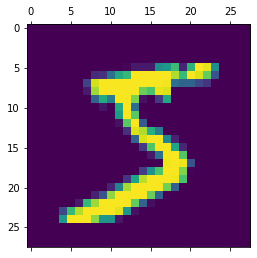

In [18]:
plt.matshow(X_train[0])

In [19]:
y_train[0]

5

In [20]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

# Normalize the data

In [21]:
X_train = X_train / 255
X_test = X_test / 255

In [23]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [24]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [28]:
X_train_flattened.shape

(60000, 784)

# Build the model

In [29]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7300 - accuracy: 0.8114
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3079 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2877 - accuracy: 0.9187
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2721 - accuracy: 0.9243
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2586 - accuracy: 0.9280


In [30]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2729 - accuracy: 0.9234


[0.2729114890098572, 0.9233999848365784]

In [31]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([4.4250131e-02, 2.5196218e-07, 5.4261923e-02, 9.5321369e-01,
       2.2775531e-03, 7.4352920e-02, 1.8752912e-06, 9.9973428e-01,
       6.9350958e-02, 7.0648783e-01], dtype=float32)

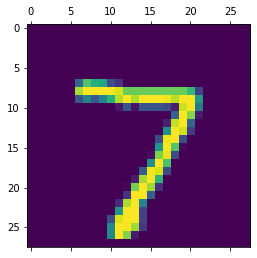

In [32]:
plt.matshow(X_test[0])

In [33]:
np.argmax(y_predicted[0])

7

In [34]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [35]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [36]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    0,    1,    2,    0,    4,    2,    2,    1,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [  10,    9,  922,   21,    8,    2,   11,   10,   34,    5],
       [   4,    0,   17,  934,    0,   21,    2,    8,   11,   13],
       [   3,    2,    4,    2,  913,    0,    9,    4,    7,   38],
       [  13,    3,    3,   38,    9,  774,   15,    4,   24,    9],
       [  16,    3,    5,    1,    7,   12,  911,    2,    1,    0],
       [   3,    5,   20,    9,    8,    0,    0,  937,    1,   45],
       [  11,    9,    6,   34,    9,   36,    9,   11,  824,   25],
       [  11,    7,    1,   12,   24,    4,    0,   14,    2,  934]])>

Text(69.0, 0.5, 'Truth')

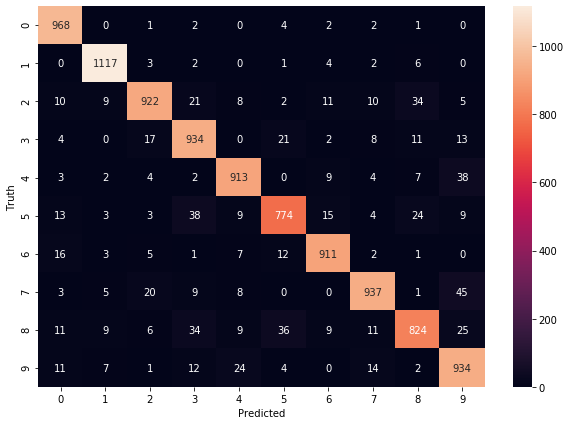

In [37]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using hidden layer

In [38]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4456 - accuracy: 0.8733
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1343 - accuracy: 0.9603
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0864 - accuracy: 0.9751
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0661 - accuracy: 0.9807
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0507 - accuracy: 0.9846


In [39]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0822 - accuracy: 0.9749


[0.08219899237155914, 0.9749000072479248]

Text(69.0, 0.5, 'Truth')

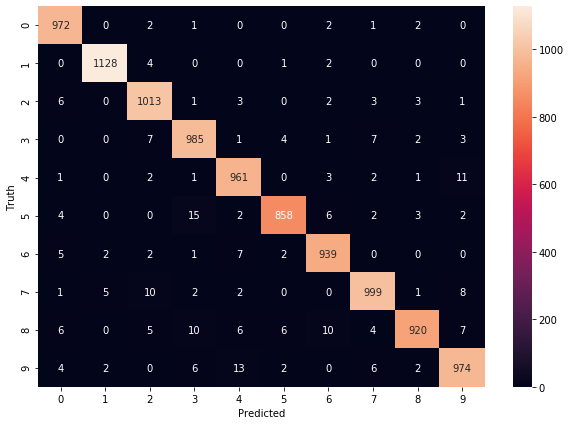

In [40]:

y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using Flatten layer so that we don't have to call .reshape on input dataset

In [41]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4603 - accuracy: 0.8719
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1345 - accuracy: 0.9608
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0890 - accuracy: 0.9732
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0651 - accuracy: 0.9802
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0489 - accuracy: 0.9853
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0414 - accuracy: 0.9871
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0314 - accuracy: 0.9901
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0296 - accuracy: 0.9913
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0237 - accuracy: 0.9928
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.018

In [42]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0816 - accuracy: 0.9791


[0.08156566321849823, 0.9790999889373779]